<br>
<img src="https://images.even3.com.br/ONieRmTALZ2ETt2LfoUY4_IopIU=/fit-in/250x250/smart/even3.blob.core.windows.net/logos/UFCSPA-logotipo-1.19fc99573cf34163a727.png" style="width: 100px;"/>
<center>Aprendizado profundo para Visão Computacional I
    <br>
    Prof. Viviane Botelho</center>
    
## <center>  **Aula 3a: Modelos de classificação multiclasse** <center>





Da aula anterior...


<img src="https://i.ibb.co/yfQwLDq/Captura-de-tela-2022-05-17-145921.png" style="width: 600px;"/>

Antes de começar: Habilitando o comando de autocompletar

In [1]:
%config Completer.use_jedi = False

In [2]:
import tensorflow as tf
import keras as ke
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import cv2
import sklearn.metrics as skm 
import seaborn as sns

2023-03-22 16:24:28.567509: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# <font color='blue'>Classificação multiclasses</font>

<img src="https://miro.medium.com/max/1400/1*JAXmOAImcf683aXaBDPPVg.jpeg" style="width: 400px;"/>

### Banco de dados: Fashion MNIST
Contém 70 mil imagens (60mil oara treinamento e 10 mil para teste) imagens em tons de cinza em 10 categorias.
https://www.tensorflow.org/tutorials/keras/classification?hl=pt-br

<img src="https://uploaddeimagens.com.br/images/003/297/013/full/Capturar.PNG?1624226287" style="width: 400px;"/>

**Objetivo: Identificar a classe da roupa**

<br>

## Importando e visualizando os dados:


In [3]:
fashion_mnist = ke.datasets.fashion_mnist
(X2, Y2), (X_teste, Y_teste) = fashion_mnist.load_data() # carregando o banco de dados

X_treino, X_val, Y_treino, Y_val = train_test_split(X2, Y2, test_size=0.2,random_state=20,shuffle=True,stratify=Y2)

Analisando o conteúdo do dataset....

In [4]:
print(np.shape(Y_treino))
print(np.shape(Y_val))
print(np.shape(Y_teste))
print(np.shape(Y2))
#print(np.shape(X_treino[0]))

(48000,)
(12000,)
(10000,)
(60000,)


In [5]:
pd.DataFrame(Y_treino).value_counts()

0    4800
1    4800
2    4800
3    4800
4    4800
5    4800
6    4800
7    4800
8    4800
9    4800
dtype: int64

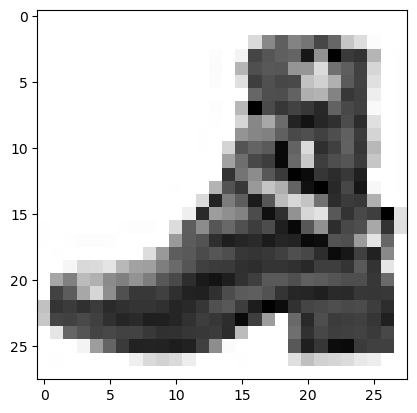

In [6]:
plt.imshow(X_treino[1850],cmap='Greys')

<font color='red'>Importante: Todas as imagens do dataset devem ter o mesmo tamanho.</font>

In [7]:
np.shape(X_treino[551])

(28, 28)

## Normalização dos dados de entrada: 
Faz parte da preparação dos dados. É uma boa prática. Garante que os dados de entrada estejam na mesma ordem de grandeza.
- Convergência mais rápida.
- Modelos numericamente mais estáveis.
- Melhores resultados.
<br>
 <center> $xnorm=\frac{x-xmin}{xmax-xmin}$ <center> 

<font color='red'>Importante: xmin e xmax devem ser ser obtidos a partir dos dados de treino. Os mesmos valores devem ser utilizados nos dados de validação, teste e quaisquer outros dados que forem ser preditos pelo modelo!</font>
<br> 
    
Alternativamente, para o caso de **imagens**:

Profundidade de cor descreve a quantidade de tons usados para representar a cor de um pixel em uma imagem ($2^{n}$, onde n é o número de bits)
 
<img src="https://www.projectorcentral.com/images/articles/BitDepthComparedgrayscale-600.jpg" style="width: 400px;"/>


In [8]:
print(np.max(X_treino[0]))

255


In [9]:
print(np.min(X_treino[0]))

0


In [10]:
X_treino = X_treino/255.0
X_teste= X_teste/255.0
X_val= X_val/255.0

In [11]:
print(Y_treino[155])

8


In [16]:
type(Y_teste)

numpy.ndarray

## Criação do Modelo: 

In [13]:
model = ke.Sequential()
model.add(ke.layers.Flatten(input_shape=(28, 28,)))
model.add(ke.layers.Dense(128, activation='relu'))
model.add(ke.layers.Dense(10, activation='softmax'))

2023-03-22 16:24:36.111829: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-22 16:24:36.112788: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Obs: É necessário informar para rede a dimensão dos dados de entrada apenas da primeira camada. A dimensão das camadas subsequentes é ajustada automaticamente
<br>

### <font color='red'> O que faz a camada Flatten? </font> 

<img src="https://uploaddeimagens.com.br/images/003/297/045/full/Capturar2.PNG?1624228050" style="width: 600px;"/>





### <font color='red'> Por que há 10 neurônios de na camada de saída? </font> 

### <font color='red'> Por que a funçao de ativação da camada de saída é softmax? </font> 
<img src="https://miro.medium.com/max/1906/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg" style="width: 300px;"/>


Pode ser interpretada como a probabilidade de uma dada saída perterncer a uma das classes



### Resumindo o modelo:

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Compilando e treinando o modelo: 

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
tf.random.set_seed(80)   # fixar o pseudo-random generator do tensorflow
np.random.seed(80)

history=model.fit(x=X_treino, y=Y_treino,
          epochs=20,
          validation_data=(X_val,Y_val))

## Avaliando os resultados: 

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="treino")
plt.plot(history.history["val_loss"], label="validacao")
plt.xlabel("epocas")
plt.ylabel("Loss")
plt.legend();
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="treino")
plt.plot(history.history["val_accuracy"], label="validacao")
plt.xlabel("epocas")
plt.ylabel("acurácia")
plt.legend();

<br>

### Verificando as imagens...
<img src="https://uploaddeimagens.com.br/images/003/297/013/full/Capturar.PNG?1624226287" style="width: 400px;"/>

In [ ]:
Y_pred_val = model.predict(X_val)

Por exemplo, avaliando uma imagem qualquer do dataset de validação....

In [ ]:
print(Y_pred_val[8])  # todas as probabilidades

In [ ]:
np.argmax(Y_pred_val[8])  #pegando a parte do modelo onde a probabilidade é maior

In [ ]:
Y_val[8]   # comparando com o valor real

In [ ]:
plt.imshow(np.reshape(X_val[8],(28,28)),cmap='Greys');

In [ ]:
def mat_conf_multi(Xmedido, ymedido, model,nome_dados):
    Y_pred_prob = model.predict(Xmedido)
    Y_pred = np.argmax(Y_pred_prob,axis=1) 
    cmat=skm.confusion_matrix(ymedido,Y_pred)
    cm_df = pd.DataFrame(cmat) 

    ax= plt.subplot()
    sns.heatmap(cm_df,annot=True, cmap='Blues',fmt="d",cbar=False)

    ax.set_xlabel('Predito');ax.set_ylabel('Real'); 
    ax.set_title('Matriz de confusão:'+nome_dados); 
    return

In [ ]:
mat_conf_multi(X_val, Y_val, model,'dados de validacao')

### Usando uma imagem qualquer (de fora do dataset)

In [ ]:
img1 = plt.imread('fig_teste2.jpg')
plt.imshow(img1)

In [ ]:
#converte para 8-bit grayscale
img2=255-cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
plt.imshow(img2,cmap='Greys')

In [ ]:
# redimensiona (28x28)
img3 = cv2.resize(img2, (28, 28), interpolation=cv2.INTER_NEAREST)
plt.imshow(img3,cmap='Greys')

In [ ]:
# normaliza
img4 = img3/255

In [ ]:
np.shape(img4)

In [ ]:
#predição
img5=np.reshape(img4,(1,28,28))
Y_img5 = model.predict(img5)
np.argmax(Y_img5)

## Codificação dos dados de saída (one-hot encoding)
Permitir que o modelo assuma uma ordem natural entre as categorias pode resultar em baixo desempenho da rede neural, pois as categorias não possuem nenhuma relação ordenada. Por isso é mais conveniente codificar.

In [ ]:
Y_treino2=tf.keras.utils.to_categorical(Y_treino)
Y_teste2=tf.keras.utils.to_categorical(Y_teste)
Y_val2=tf.keras.utils.to_categorical(Y_val)

In [ ]:
model2 = ke.Sequential()
model2.add(ke.layers.Flatten(input_shape=(28, 28,)))
model2.add(ke.layers.Dense(128, activation='relu'))
model2.add(ke.layers.Dense(10, activation='softmax'))

model2.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history=model2.fit(x=X_treino, y=Y_treino2,
          epochs=20,
          validation_data=(X_val,Y_val2))

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="treino")
plt.plot(history.history["val_loss"], label="validacao")
plt.xlabel("epocas")
plt.ylabel("Loss")
plt.legend();
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="treino")
plt.plot(history.history["val_accuracy"], label="validacao")
plt.xlabel("epocas")
plt.ylabel("acurácia")
plt.legend();

In [ ]:
mat_conf_multi(X_val, Y_val, model2,'dados de validacao')